# Data Analysis of Coronavirus(COVID-19) Outbreak 

## Data Source 
- https://github.com/CSSEGISandData/COVID-19
- https://github.com/RamiKrispin/coronavirus
- https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

## Questions 
- Number of Cases
- Which country has the highest cases
- Top countries affected
- Distribution Per Continent
- Cases Per Day
- Cases Per Country(Affected Country)

## Load Packages 

In [1]:
# numerical computations 
import numpy as np # for linear algebra 
import pandas as pd # for data manipulation 

In [32]:
# data visualizations 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [3]:
# map visualization 
import geopandas as gpd 
from shapely.geometry import Point, Polygon
import descartes

In [4]:
# load data 
df = pd.read_csv("../data/cleaned_data/full_covid-19_cleaned_data.csv")

In [5]:
# examine first few rows 
df.head() 

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [6]:
# columns 
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [7]:
# rename 
df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region"}, inplace=True)

In [8]:
df.columns 

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [9]:
# shape 
df.shape 

(31062, 8)

In [10]:
# data types 
df.dtypes

Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [11]:
# missing values 
df.isna().sum() 

Province_State    0
Country_Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [12]:
# summary 
df.describe() 

,Lat,Long,Confirmed,Deaths,Recovered
count,31062.000000,31062.000000,31062.000000,31062.000000,31062.000000
mean,30.285772,-33.097762,178.106400,6.338162,63.775127
std,19.851022,80.581967,2597.644775,122.575178,1412.841770
min,-41.454500,-157.858400,0.000000,0.000000,0.000000
25%,23.341700,-90.230800,0.000000,0.000000,0.000000
50%,37.251900,-73.182200,0.000000,0.000000,0.000000
75%,42.165700,21.824300,1.000000,0.000000,0.000000
max,72.000000,178.065000,67800.000000,5476.000000,59879.000000


In [18]:
# convert df to GeoDataFrame: method-1 
gdf1 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Long'], df['Lat'])) 

In [19]:
# type 
type(gdf1)

geopandas.geodataframe.GeoDataFrame

In [20]:
# head 
gdf1.head() 

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0,POINT (101.00000 15.00000)
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0,POINT (138.00000 36.00000)
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0,POINT (103.83330 1.28330)
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0,POINT (84.25000 28.16670)
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,POINT (112.50000 2.50000)


In [22]:
# convert df to GeoDataFrame: method-2 
points = [Point(x,y) for x, y in zip(df.Long, df.Lat)]
gdf2 = gpd.GeoDataFrame(df, geometry=points)

In [23]:
# type 
type(gdf2)

geopandas.geodataframe.GeoDataFrame

In [24]:
# head
gdf2.head() 

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0,POINT (101.00000 15.00000)
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0,POINT (138.00000 36.00000)
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0,POINT (103.83330 1.28330)
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0,POINT (84.25000 28.16670)
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,POINT (112.50000 2.50000)


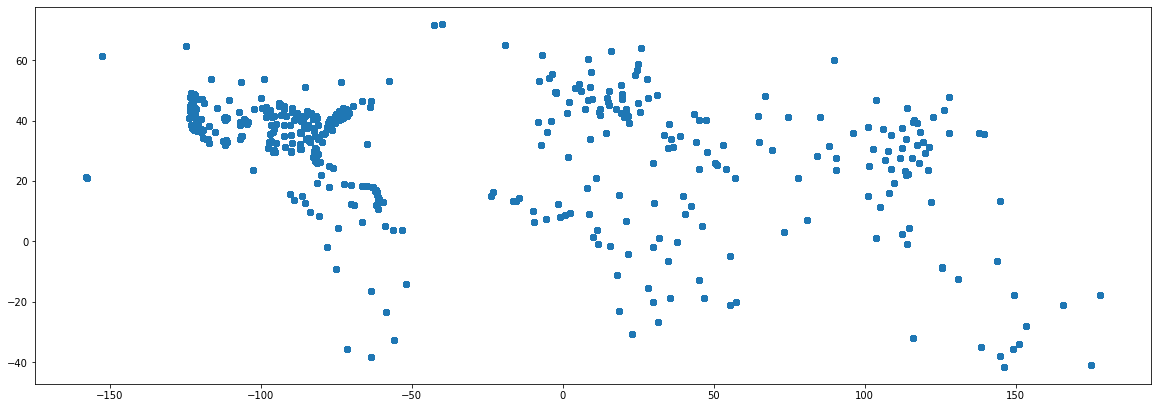

In [26]:
# map plot 
gdf1.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

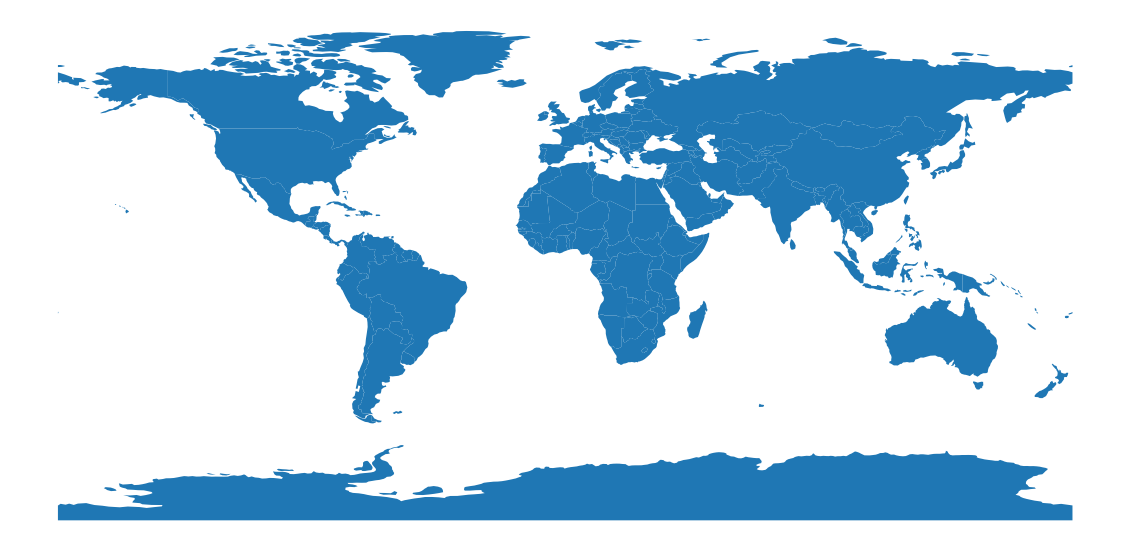

In [28]:
# overlaping with world map 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

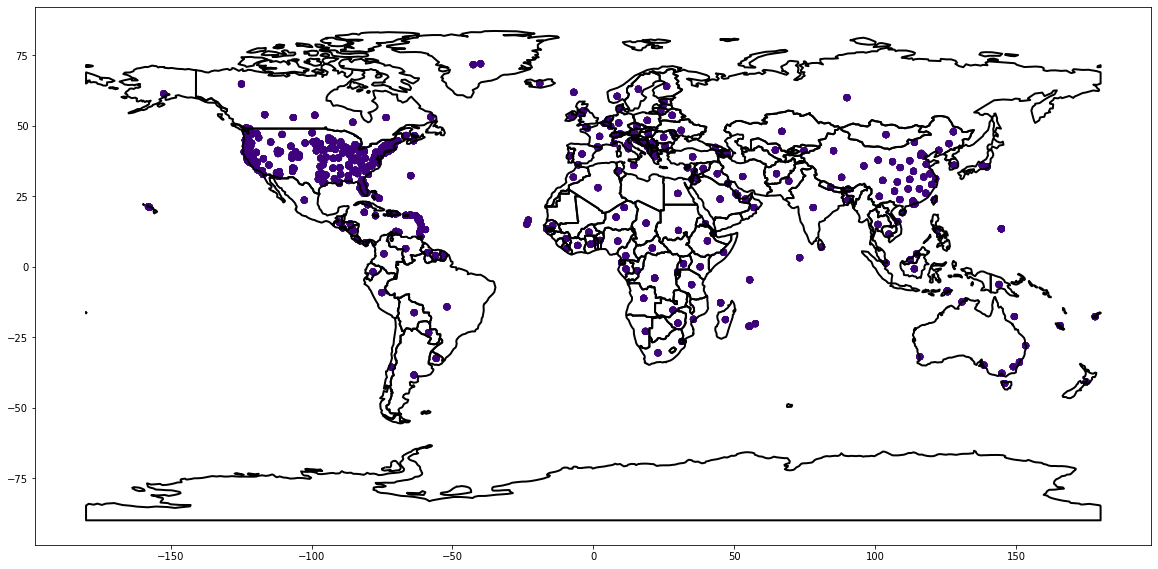

In [33]:
# Overlap 
fig,ax = plt.subplots(figsize=(20,10))
gdf1.plot(cmap='Purples', ax=ax) 
world.geometry.boundary.plot(color=None, edgecolor='k', linewidth=2, ax=ax)

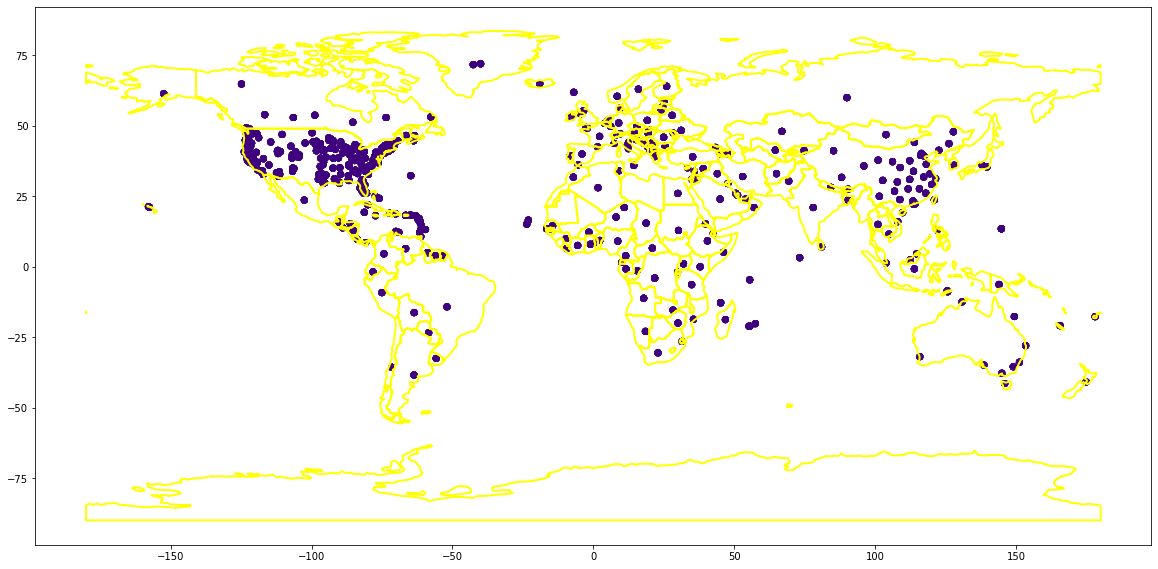

In [34]:
# Overlap 
fig,ax = plt.subplots(figsize=(20,10))
gdf1.plot(cmap='Purples', ax=ax) 
world.geometry.boundary.plot(color='Yellow', edgecolor='k', linewidth=2, ax=ax)

In [35]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [36]:
world['continent'].unique() 

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [37]:
asia = world[world['continent'] == 'Asia']

In [38]:
asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [39]:
africa = world[world['continent'] == 'Africa']
north_america = world[world['continent'] == 'North America']
europe = world[world['continent'] == 'Europe']

/home/jubayer/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


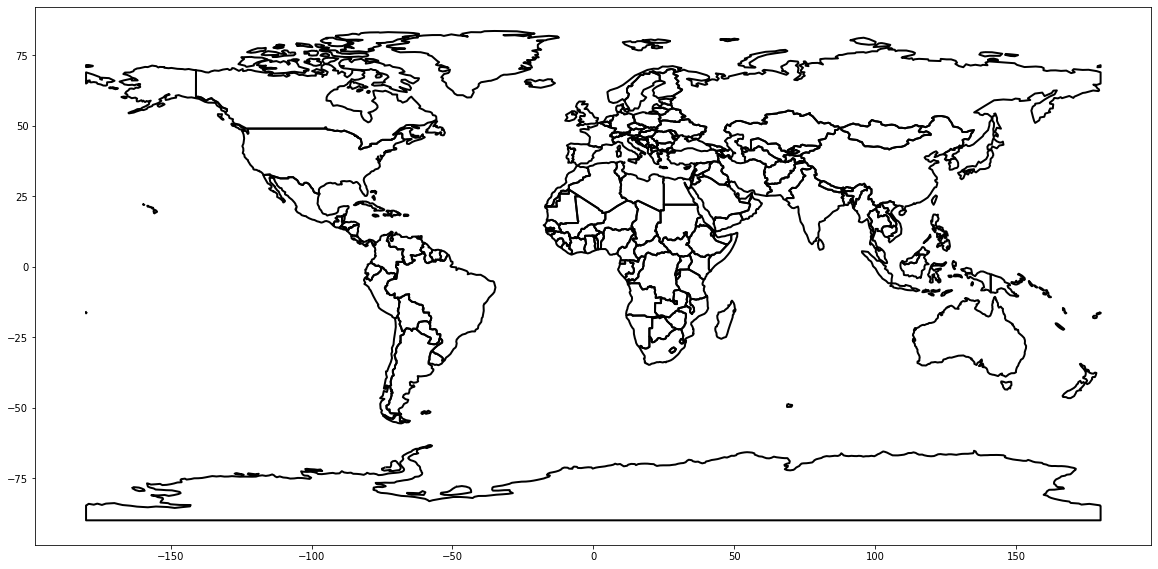

In [42]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf1[gdf1['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)